In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('C:/Users/jnave/Dropbox/My PC (LAPTOP-USDFL75P)/Downloads/news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


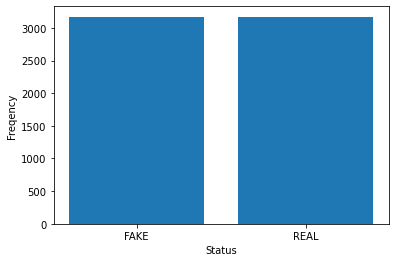

In [4]:
import matplotlib.pyplot as plt
import collections
import numpy as np
a=df['label']
d=collections.Counter(a)
xpos=[0,1]
x_label=list(d.keys())
y_label=list(d.values())
plt.bar(xpos,y_label)
plt.xlabel('Status')
plt.ylabel('Freqency')
plt.xticks(xpos,x_label)
plt.show()

In [5]:
x=df.iloc[:,2].values
y=df.iloc[:,3].values

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [7]:
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

**METHOD 1 - SVC(Direct Method)**


In [8]:
from sklearn.svm import SVC
model_1=SVC()

In [9]:
model_1.fit(x_train_vect,y_train)

SVC()

In [10]:
y_pred_1=model_1.predict(x_test_vect)
y_pred_1

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [11]:
accuracy_score(y_pred_1,y_test)

0.8642676767676768

**METHOD 2 - SVC + PIPELINE**


In [12]:
from sklearn.pipeline import make_pipeline
model_2=make_pipeline(CountVectorizer(),SVC())
model_2.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [13]:
y_pred_2=model_2.predict(x_test)
y_pred_2

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [14]:
accuracy_score(y_pred_2,y_test)

0.8383838383838383

**NAIVE BAYES**

In [15]:
from sklearn.naive_bayes import MultinomialNB
model_3=MultinomialNB()

In [16]:
model_3.fit(x_train_vect,y_train)

MultinomialNB()

In [17]:
y_pred_3=model_3.predict(x_test_vect)
y_pred_3

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U4')

In [18]:
accuracy_score(y_pred_3,y_test)

0.8819444444444444

**MULTINOMIAL NB + PIPELINE**

In [19]:
from sklearn.pipeline import make_pipeline
model_4=make_pipeline(CountVectorizer(),MultinomialNB())
model_4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [20]:
y_pred_4=model_4.predict(x_test)
y_pred_4

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U4')

In [21]:
accuracy_score(y_pred_4,y_test)

0.8781565656565656

In [22]:
import joblib
joblib.dump(model_4,'Real-Fake')

['Real-Fake']

In [23]:
import joblib
text_model=joblib.load('Real-Fake')

In [24]:
text_model.predict(['Hi How are You?'])
#predicting any normal message as fake

array(['FAKE'], dtype='<U4')

**Streamlit**

In [25]:
!pip install streamlit --quiet

In [26]:
%%writefile predictor.py

import streamlit as st
import joblib

st.title("Real-Fake classifier : ")
text_model=joblib.load('Real-Fake')
inp=st.text_input("Enter the message : ")
opt=text_model.predict([inp])
if st.button('Predict'):
  st.title("The message entered is : "+opt[0])

Overwriting predictor.py


In [ ]:
!streamlit run predictor.py &npx localtunnel --port 8501